In [ ]:
## importing packages

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")


In [15]:
## loading dataset from csv to numpy ndarray

In [16]:
ds=np.loadtxt(open("PCA_practice_dataset.csv", "rb"), delimiter=",", skiprows=1)
dsm=np.matrix(ds)


In [ ]:
## calculating covariance ,eigen vector and eigen value

In [17]:
cov=np.cov(dsm)
cov.shape
eig_val,eig_vec = np.linalg.eig(cov)


In [18]:
## finding right singular vector

In [20]:
evec_list = []

for i in range(eig_vec.shape[1]):
    eig1 = dsm.T@eig_vec[:,i]
    eig1 = eig1/eig_val[i]
    evec_list.append(np.ravel(eig1))
    






In [21]:
## finding principal component and scree plot after thresholding

Number of principle components for 0.90: is 4
Number of principle components for 0.91: is 5
Number of principle components for 0.92: is 5
Number of principle components for 0.93: is 6
Number of principle components for 0.94: is 6
Number of principle components for 0.95: is 7
Number of principle components for 0.96: is 7
Number of principle components for 0.97: is 9


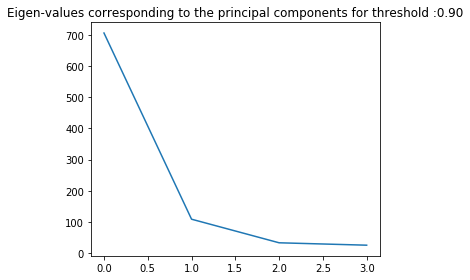

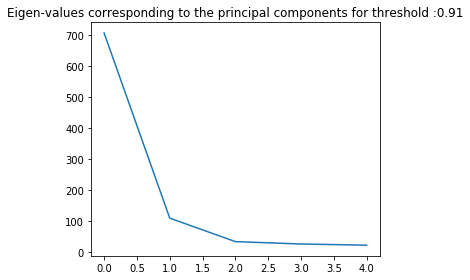

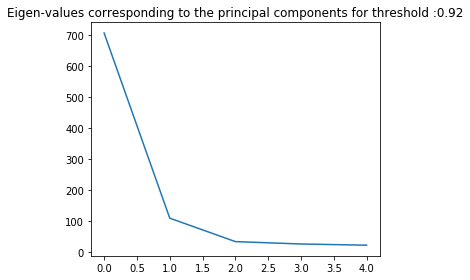

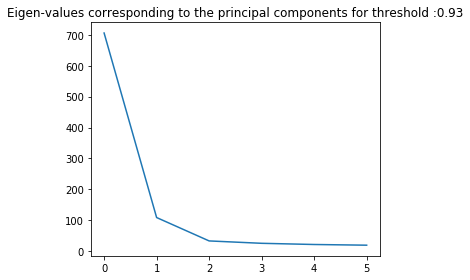

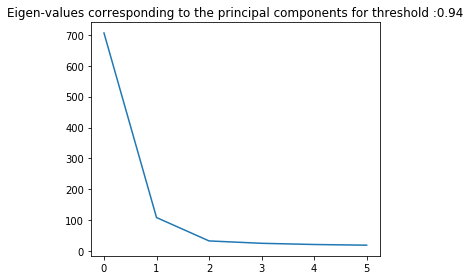

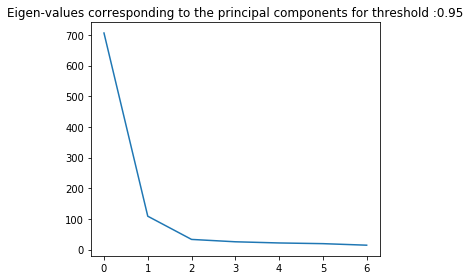

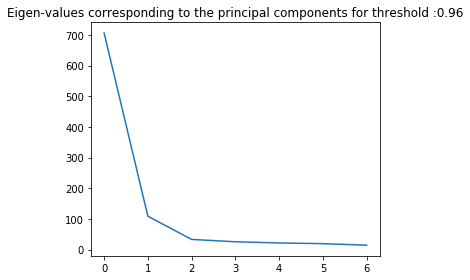

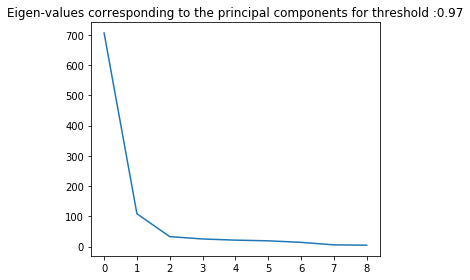

In [22]:
sort_ev = np.argsort(eig_val) 
sort_ev = sort_ev[::-1]

eig_val_sum = np.sum(eig_val)

th=.90 

while (th <.98):
 temp_sum = 0
 principal_eig_vec = []
 principal_eig_val = []
 i=0
 while(temp_sum<th*eig_val_sum):
     principal_eig_vec.append(evec_list[sort_ev[i]])
     principal_eig_val.append(eig_val[sort_ev[i]])
     temp_sum += eig_val[sort_ev[i]]
     i += 1
 print("Number of principle components for {:0.2f}: is {i}".format(th,i=i))

 fig, pev = plt.subplots()

 pev.plot(principal_eig_val)
 pev.set_title("Eigen-values corresponding to the principal components for threshold :{:0.2f}".format(th))

 plt.tight_layout()
 th=th+0.01